In [45]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [46]:
df = pd.read_csv('datasets/train_set.csv')
test_df = pd.read_csv('datasets/test_set.csv')


X = df.loc[:, 'month':]
y = df['cpi_pct']


X_test = test_df.loc[:, X.columns]

## Benchmark Model 1

In [ ]:
# first we gonna build 2 benchark Models
# the first is just gonna predict the mean of the test target variable
# the second is just gonna predict the previous month cpi
pci_mean = y.mean()

y_test_pred = pd.DataFrame(pci_mean, columns=['pred'], index=range(X_test.shape[0]))
# y_test_pred.to_csv('predictions/benchmark1_mean.csv')

## Benchmark Model 2

for the second model we already saved the prev cpi value as our test prediction:

`test_df[['cpi_lag1']].rename({'cpi_lag1': 'pred'}, axis=1).reset_index(drop=True).to_csv('predictions/benchmark2_prev.csv')`

## Benchmark Model 3

In [47]:
model = RandomForestRegressor(n_estimators=300, max_features=0.2, max_samples=0.25, min_samples_leaf=3, n_jobs=-1)

In [48]:
model.fit(X, y)

RandomForestRegressor(max_features=0.2, max_samples=0.25, min_samples_leaf=3,
                      n_estimators=300, n_jobs=-1)

In [49]:
pred = model.predict(X_test)

In [50]:
pd.DataFrame(pred, columns=['pred']).to_csv('predictions/benchmark3_rf.csv')

## Random Forrest Feature Importance

<Axes: >

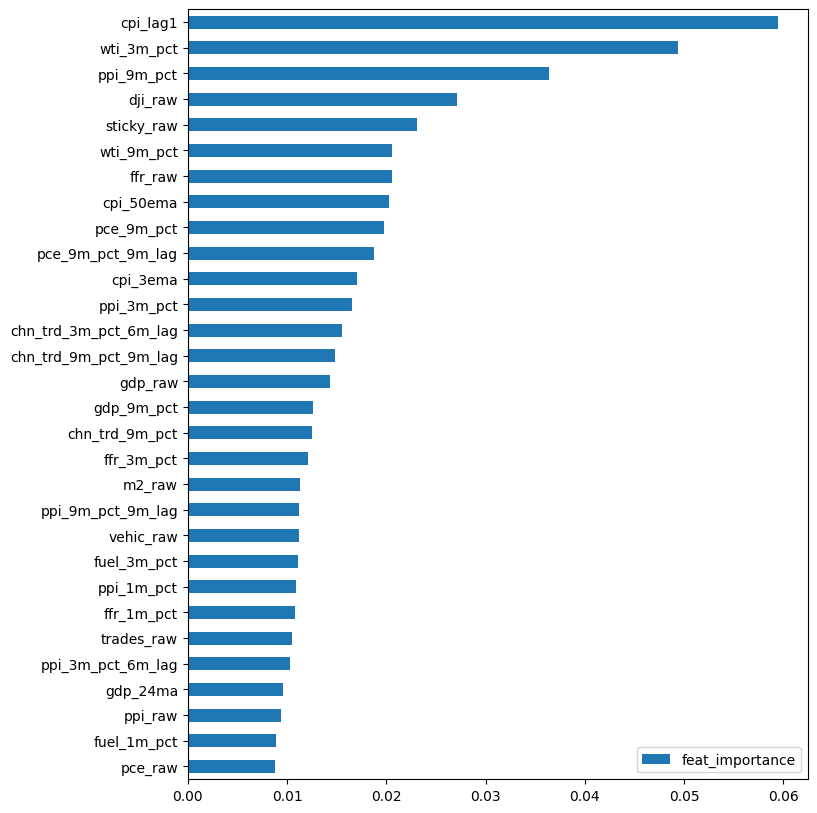

In [51]:
rf_features = pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['feat_importance'])
rf_features.sort_values('feat_importance', ascending=True).iloc[-30:].plot(kind='barh', figsize=(8, 10))

In [52]:
rf_features.sort_values('feat_importance', ascending=False).to_csv('models/rf_features.csv')